---
title: "2023_Kronensicherung_Plesse_Analyse_Randfaserdehnung"
author: "Kyell Jensen"
date: "2024-08-06"
format: pdf
editor: visual
---

# 2023_Kronensicherung_Plesse_Analyse_Randfaserdehnung

## Kombinierte Analyse LineScale3, TreeQinetic und Versuchsaufzeichung

Nutze eine geeignete Python 3.11 Umgebung (z. B. virtuelle Environment).

## Arbeitsumgebung vorbereiten

### IMPORT: Packages

In [145]:
# Struktur & Typen
from pathlib import Path
from typing import Dict, List

# Datenverarbeitung
import json
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from slugify import slugify  # Zum Vereinheitlichen von Strings

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Statistik
from scipy.stats import linregress, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc

In [146]:
# Eigene Module und Funktionen
from kj_core.utils.latex_export import (
    generate_latex_table,
    generate_grouped_latex_tables,
    save_latex_table,
    build_data_dict_df
)
from kj_core.utils.labeling import (
    get_label_from_dict,
    get_color_dict
)
from kj_core import (
    CoreConfig,
    PlotManager,
    get_logger
)

# Projekteinstellungen
from project_config import (
    working_directory,
    data_export_directory,
    latex_export_directory,
    filename_clean_dataset,
    filename_clean_data_dict
)

### IMPORT: Manager Instanzen

In [147]:
logger = get_logger(__name__)
CONFIG = CoreConfig(working_directory=f"{working_directory}/combined")
PLOT_MANAGER = PlotManager(CONFIG)

2025-04-10 13:05:53 [WARNING] kj_core.core_config.set_working_directory: The directory C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined already exists.
2025-04-10 13:05:53 [INFO] kj_core.core_config.set_working_directory: Working directory set to C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined!
2025-04-10 13:05:53 [INFO] kj_core.core_config.__init__: <CoreConfig>
  Package:            kj_core
  Working Directory:  C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined
  Plot Directory:     C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined\plots
  Data Directory:     C:\kyellsen\005_Projekte\2024

## IMPORT: Daten Import

In [148]:
# Dateien laden
df = pd.read_feather(data_export_directory / filename_clean_dataset)

with open(data_export_directory / filename_clean_data_dict, "r", encoding="utf-8") as f:
    data_dict = json.load(f)

## ANALYSE: Explorative Datenanalyse

In [149]:
df.head(10)

,id,rope_datetime,treatment,release_force_target,rope_release,cable_max,sensor_name,location,direction,height,...,frequency_damped,phase_angle,y_shift,x_shift,frequency_undamped,damping_ratio,metrics_warning,pearson_r,nrmse,nmae
4,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(90),StB,elongation,16.55,...,0.441518,0.200000,-5.287164,0.116641,0.442936,0.503994,False,0.943158,0.038866,0.018011
5,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(92),StB,elongation,11.6,...,0.432441,-0.200000,-14.233644,-0.009730,0.436601,0.873595,False,0.929554,0.034560,0.016183
6,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(95),StA,elongation,11.6,...,0.422702,-0.200000,-19.011309,-0.123043,0.426319,0.823807,False,0.908058,0.044873,0.024274
7,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(98),StA,elongation,16.85,...,0.443529,-0.065967,-1.099515,0.118608,0.445993,0.663224,False,0.980663,0.029621,0.021087
8,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(90),StB,elongation,16.55,...,0.440653,0.200000,7.775284,0.097887,0.441317,0.344951,False,0.957380,0.043035,0.018619
9,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(92),StB,elongation,11.6,...,0.439321,-0.075771,7.052210,0.094719,0.441380,0.608931,False,0.933463,0.043534,0.021255
10,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(95),StA,elongation,11.6,...,0.436023,-0.200000,-3.785755,-0.075741,0.438127,0.618021,False,0.938307,0.039020,0.022498
11,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(98),StA,elongation,16.85,...,0.441350,-0.200000,-17.747289,-0.203345,0.442888,0.525070,False,0.974139,0.028693,0.020715
12,4,2022-03-23 11:54:33,free,2.8,2.73950,NaN,Elasto(90),StB,elongation,16.55,...,0.439065,0.200000,-23.445975,0.120929,0.439764,0.354677,False,0.945320,0.049764,0.021509
13,4,2022-03-23 11:54:33,free,2.8,2.73950,NaN,Elasto(92),StB,elongation,11.6,...,0.436850,-0.200000,-19.454720,0.061912,0.438829,0.598701,False,0.922665,0.050822,0.020659


In [150]:
df.columns

Index(['id', 'rope_datetime', 'treatment', 'release_force_target',
       'rope_release', 'cable_max', 'sensor_name', 'location', 'direction',
       'height', 'diameter', 'max_strain', 'max_compression', 'm_amplitude',
       'm_amplitude_2', 'initial_amplitude', 'damping_coeff',
       'frequency_damped', 'phase_angle', 'y_shift', 'x_shift',
       'frequency_undamped', 'damping_ratio', 'metrics_warning', 'pearson_r',
       'nrmse', 'nmae'],
      dtype='object')

### COMBINED: Definition von Darstellungsstandards
Festlegen von Farbcodes für einheitliche Darstellung von Sensoren und Behandlungsvarianten für alle nachfolgenden Plots.

In [151]:
color_palette = PLOT_MANAGER.color_palette_list

# Für die Spalte "treatment":
treatment_color_dict = get_color_dict(df, "treatment", PLOT_MANAGER.color_palette_list)
# Für die Spalte "sensor_name":
sensor_color_dict = get_color_dict(df, "sensor_name", PLOT_MANAGER.color_palette_list)

Index(['free', 'gefa_dynamic', 'cobra_static'], dtype='object')
Index(['Elasto(90)', 'Elasto(92)', 'Elasto(95)', 'Elasto(98)'], dtype='object')


### PTQ ANALYSE: Einhaltung der maximalen Randfaserdehnung

In [152]:
result = (
    df.groupby('sensor_name', observed=True)[['max_strain', 'max_compression']]
      .agg(['min', 'median', 'max'])
)
result = result.reset_index()
result

sensor_name max_strain               max_compression             
                     min median    max             min median   max
0  Elasto(90)      310.2  354.7  429.6          -210.4 -155.6 -57.7
1  Elasto(92)      184.6  228.3  291.5          -111.0  -40.8  -2.9
2  Elasto(95)      155.3  216.9  266.3          -115.7  -29.2  -1.7
3  Elasto(98)      128.9  184.8  234.6          -192.9 -124.8 -69.4

In [153]:
result = result.rename_axis(index={"sensor_name": get_label_from_dict("sensor_name", data_dict)})

# Da 'result' einen MultiIndex bei den Spalten hat, ändern wir nur die erste Ebene (also die Variablennamen)
new_level0 = [get_label_from_dict(col, data_dict, template="{Zeichen}" ) for col in result.columns.levels[0]]
result.columns = result.columns.set_levels(new_level0, level=0)

result

sensor $\Delta L_{\mathrm{max}}$                \
                                    min median    max   
0  Elasto(90)                     310.2  354.7  429.6   
1  Elasto(92)                     184.6  228.3  291.5   
2  Elasto(95)                     155.3  216.9  266.3   
3  Elasto(98)                     128.9  184.8  234.6   

  $\Delta L_{\mathrm{comp,max}}$               
                             min median   max  
0                         -210.4 -155.6 -57.7  
1                         -111.0  -40.8  -2.9  
2                         -115.7  -29.2  -1.7  
3                         -192.9 -124.8 -69.4

In [154]:
latex_string = result.to_latex(index=False, escape=False, column_format="l|rrr|rrr", float_format="{:.1f}".format, multicolumn_format="c")

caption = "Feldversuch 2 - Ergebnisse, Dehnungswerte der Elastometer"
caption_long = "Feldversuch 2 - Ergebnisse, statistische Zusammenfassung der absoluten Randfaserdehnung/-Stauchung  $\Delta L_{\mathrm{max}}$/$\Delta L_{\mathrm{comp,max}}$ der Elastometer, in µm über die Länge der Messgeräte von 200~mm, jeweils Wert über alle Messungen, positive Werte = Faserdehnung, negative Werte = Faserstauchung"
save_latex_table(latex_string, caption, latex_export_directory, caption_long)

Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\feldversuch_2_ergebnisse_dehnungswerte_der_elastometer.tex


In [155]:
# Pivotieren: 'id' wird zum Zeilenindex, und es werden für jeden sensor_name die Werte der Spalten 'max_strain' und 'max_compression' eingefügt.
pivot_df = df.pivot(index='id', columns='sensor_name', values=['max_strain', 'max_compression']) \
             .swaplevel(0, 1, axis=1) \
             .sort_index(axis=1, level=0)

In [156]:
pivot_df.index.name = get_label_from_dict("id", data_dict, template="{Zeichen}")
pivot_df.columns = pivot_df.columns.set_levels(["min", "max"], level=1)

# Optional: Den Index wieder als normale Spalte hinzufügen, wenn du das so möchtest
pivot_df.columns.names = [get_label_from_dict("sensor_name", data_dict, template="{Zeichen}"), ""]

pivot_df.reset_index(drop=True)
pivot_df

sensor Elasto(90)        Elasto(92)        Elasto(95)        Elasto(98)       
              min    max        min    max        min    max        min    max
ID                                                                            
2          -202.2  429.6     -111.0  282.6      -90.4  254.4      -93.8  207.9
3          -180.0  427.8      -87.0  291.5     -106.8  262.2     -139.1  193.7
4          -179.2  401.9     -110.3  266.8     -115.7  250.1     -139.4  171.8
5          -187.2  385.9      -94.4  251.5      -71.1  236.7     -114.4  196.2
6          -202.6  345.3      -98.8  231.0     -111.8  198.0     -166.6  145.6
7          -207.2  343.9     -101.2  229.4     -111.0  240.3     -157.9  191.6
8          -181.1  320.9      -88.1  207.6      -95.2  179.9     -140.9  153.6
9          -180.9  315.2      -88.6  203.1     -101.6  201.5     -133.6  165.0
10         -175.6  313.1      -80.9  207.9     -109.0  187.2     -156.8  128.9
11         -210.4  367.3      -50.6  244.3      -63.9  221.1     -157.6  158.6
12         -142.7  412.5      -16.5  283.6      -28.5  263.6     -192.9  189.1
13         -184.0  412.5      -40.8  275.2      -15.8  266.3      -75.6  234.6
14         -155.6  353.4      -43.1  224.1      -29.2  216.9      -89.6  173.2
15         -167.0  357.1      -31.8  228.3      -39.9  206.0     -127.4  162.0
16         -159.0  371.8      -27.6  242.5      -22.1  232.9     -123.5  184.8
17         -126.5  335.3      -16.1  215.8      -37.0  225.3     -137.5  196.2
18         -145.3  352.1      -19.6  226.8      -25.1  226.0      -85.5  214.0
19         -103.4  327.6      -28.1  208.5      -30.2  234.5     -122.5  208.4
20         -119.3  369.8      -39.4  225.7      -21.1  197.8     -124.8  169.9
21         -135.8  375.7      -41.5  236.2      -18.8  213.8     -127.1  166.2
22          -67.8  382.4      -24.6  246.1      -13.3  237.3      -69.4  201.4
23         -133.9  354.7       -5.1  236.6      -24.5  210.1     -139.7  166.8
24          -57.7  391.4       -9.5  221.4      -17.7  172.9     -109.3  153.9
25         -111.5  354.3      -68.2  221.7      -26.3  210.5     -108.4  228.1
26         -117.3  310.9      -15.5  186.1       -9.6  207.7     -107.1  209.9
27          -95.0  310.2      -32.9  184.6       -1.7  195.8      -87.6  188.1
28          -95.4  323.2       -2.9  188.9      -24.5  155.3     -108.4  149.1

In [157]:
latex_string = pivot_df.to_latex(index=True, escape=False, column_format="l|rr|rr|rr|rr", float_format="{:0.1f}".format, multicolumn_format="c")

caption = "Feldversuch 2 - Ergebnisse, Maximalwerte Elastometer vollständig"
caption_long = "Feldversuch 2 - Ergebnisse, gemessene maximale absolute Randfaserdehnung der Elastometer $\Delta L_{\mathrm{max}}$ in µm über die Länge der Messgeräte von 200~mm, max = maximale Faserdehnung, min. = maximale Faserstauchung"
save_latex_table(latex_string, caption, latex_export_directory, caption_long)

Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\feldversuch_2_ergebnisse_maximalwerte_elastometer_vollstandig.tex


Plotten der Maximalwerte der Vorspannung für Dehnung und Stauchung. Für jede Messung werden erst die maximalen Werte berechnet und dann getrennt nach Elasto die Verteilung im Boxplot dargestellt.
Auffällig ist Elasto(90) mit den höchsten Dehnungswerten. Dieses Gerät ist am geringfügig dünneren Stämmling angebracht. Die Vorspannung wurde aufgrund der maximalen Messwerte von 429 µm nicht weiter erhöht.

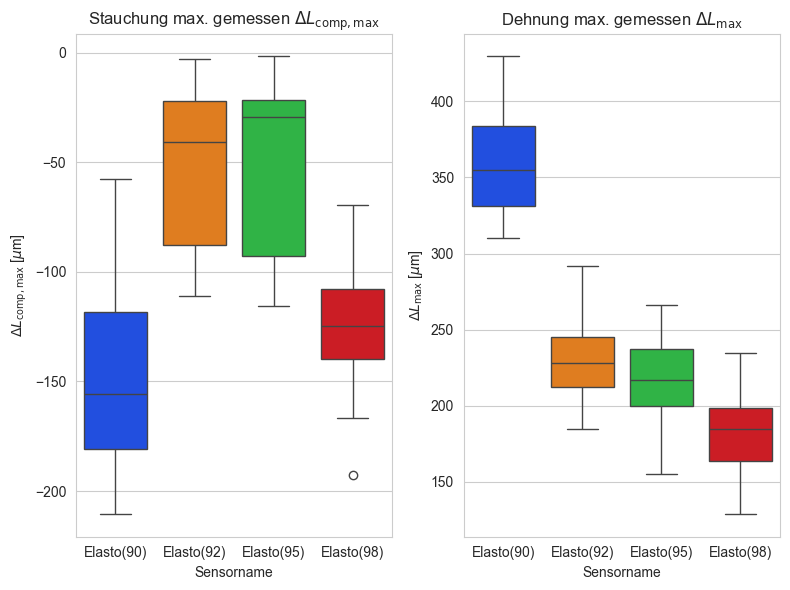

In [158]:
titel_comp_string = get_label_from_dict("max_compression", data_dict, use_titel=True)
titel_strain_string = get_label_from_dict("max_strain", data_dict, use_titel=True)
label_comp_string = get_label_from_dict("max_compression", data_dict, use_axes=True)
label_strain_string = get_label_from_dict("max_strain", data_dict,  use_axes=True)


# Erstelle die Subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Boxplot für die minimalen Werte (maximale Compression)
sns.boxplot(data=df, x='sensor_name', y='max_compression', hue='sensor_name', palette=sensor_color_dict, ax=axs[0], legend=False)
axs[0].set_title(titel_comp_string)
axs[0].set_xlabel("Sensorname")
axs[0].set_ylabel(label_comp_string)

# Boxplot für die maximalen Werte (maximale Strain)
sns.boxplot(data=df, x='sensor_name', y='max_strain', hue='sensor_name', palette=sensor_color_dict, ax=axs[1], legend=False)
axs[1].set_title(titel_strain_string)
axs[1].set_xlabel("Sensorname")
axs[1].set_ylabel(label_strain_string)

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

PLOT_MANAGER.save_plot(fig, filename="max_strain_per_elasto", subdir="ptq_strain")

### ANALYSE: Vergleichende Berechnung der Randfaserdehnung

In [159]:
# Funktion zur Berechnung der Randfaserdehnung (in Dezimalschreibweise)
def calculate_epsilon(force: float, H: float, h: float, d: float, E: float) -> float:
    """
    Berechnet die Randfaserdehnung epsilon (dimensionslos, nicht in %).
    
    Parameters:
        force (float): Zugkraft im Seil (in kN)
        H (float): Höhe des Angriffspunktes der Zugkraft über dem Stammfuß (in m)
        h (float): Höhe des Berechnungspunktes über dem Boden (in m)
        d (float): Durchmesser des Stammquerschnitts auf Höhe h (in m)
        E (float): Elastizitätsmodul des Holzes (in MPa)
    
    Returns:
        float: Berechnete Randfaserdehnung epsilon (dimensionslos)
    """
    force_N = force * 1000  # Umrechnung der Zugkraft von kN in N
    M = force_N * (H - h)  # Biegemoment in N·m
    y_max = d / 2  # maximaler Abstand zur neutralen Achse in m
    I = (np.pi / 64) * d**4  # Flächenträgheitsmoment in m^4
    E_Pa = E * 1e6  # Umrechnung des Elastizitätsmoduls von MPa in N/m^2
    epsilon = (M * y_max) / (E_Pa * I)  # Dehnung in Dezimalschreibweise
    return epsilon

# Funktion zur Berechnung der absoluten Längenänderung
def calculate_delta_l(epsilon: float, l0: float) -> float:
    """
    Berechnet die absolute Längenänderung Delta L in Mikrometer.
    
    Parameters:
        epsilon (float): Relative Dehnung (dimensionslos)
        l0 (float): Ausgangslänge des Elastometers (in mm)
    
    Returns:
        float: Absolute Längenänderung Delta L in Mikrometer (µm)
    """
    l0_m = l0 / 1000  # Umrechnung der Ausgangslänge von mm in m
    delta_L = epsilon * l0_m * 1e6  # Umrechnung der Längenänderung in µm
    return delta_L


In [160]:
# Fixwerte
l0 = 200  # mm, Ausgangslänge Elastometer
E = 8500  # Elastizitätsmodul Buche in MPa
height_rope = 18.30  # m, Höhe des Angriffspunktes der Zugkraft

# Berechnung der neuen Spalten
df['calc_max_strain_relativ'] = df.apply(lambda row: calculate_epsilon(
    row['rope_release'], height_rope, row['height'], row['diameter'], E), axis=1)
df['calc_max_strain'] = df['calc_max_strain_relativ'].apply(lambda epsilon: calculate_delta_l(epsilon, l0))

In [161]:
# Berechnung der Differenz und der absoluten Differenz in Prozent
df['strain_difference'] = (df['calc_max_strain'] - df['max_strain']) / df['max_strain'] * 100

In [162]:
df.head(4)

,id,rope_datetime,treatment,release_force_target,rope_release,cable_max,sensor_name,location,direction,height,...,x_shift,frequency_undamped,damping_ratio,metrics_warning,pearson_r,nrmse,nmae,calc_max_strain_relativ,calc_max_strain,strain_difference
4,2,2022-03-23 11:24:23,free,2.8,2.7231,NaN,Elasto(90),StB,elongation,16.55,...,0.116641,0.442936,0.503994,False,0.943158,0.038866,0.018011,0.000908,181.500762,-57.751219
5,2,2022-03-23 11:24:23,free,2.8,2.7231,NaN,Elasto(92),StB,elongation,11.6,...,-0.009730,0.436601,0.873595,False,0.929554,0.034560,0.016183,0.001544,308.857683,9.291466
6,2,2022-03-23 11:24:23,free,2.8,2.7231,NaN,Elasto(95),StA,elongation,11.6,...,-0.123043,0.426319,0.823807,False,0.908058,0.044873,0.024274,0.001485,296.979869,16.737370
7,2,2022-03-23 11:24:23,free,2.8,2.7231,NaN,Elasto(98),StA,elongation,16.85,...,0.118608,0.445993,0.663224,False,0.980663,0.029621,0.021087,0.000560,111.931536,-46.160877


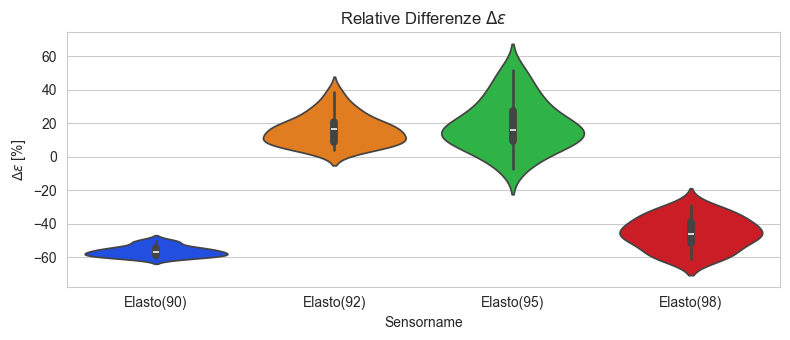

In [163]:
# Achsenvariablen definieren
x_key = 'sensor_name'
y_key = 'strain_difference'

plot_title = f"Relative Differenze {get_label_from_dict(y_key, data_dict, template='{Zeichen}')}"
filename = f"diff_{x_key}_{y_key}"

# Create violin plot for strain_difference grouped by sensor_name
fig = plt.figure(figsize=(8, 3.5))
sns.violinplot(x='sensor_name', y='strain_difference', hue='sensor_name', palette=sensor_color_dict, data=df)
plt.title(plot_title)
plt.xlabel("Sensorname")
plt.ylabel(get_label_from_dict(y_key, data_dict, template="{Zeichen}")+" [%]")
# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

PLOT_MANAGER.save_plot(fig, filename=filename, subdir="ptq_strain")

In [164]:
# Gruppierung nach 'sensor_name'
grouped = df.groupby('sensor_name', observed=True)

# Liste zur Speicherung der Ergebnisse
results = []

for name, group in grouped:
    # Lineare Regression durchführen
    X = sm.add_constant(group['max_strain'])  # Intercept hinzufügen
    y = group['calc_max_strain']
    model = sm.OLS(y, X).fit()
    
    # Kennzahlen extrahieren
    intercept = model.params['const']
    slope = model.params['max_strain']
    r_squared = model.rsquared
    p_value = model.pvalues['max_strain']
    conf_int_lower, conf_int_upper = model.conf_int().loc['max_strain']
    
    # Ergebnisse speichern
    results.append({
        'Sensor': name,
        'Intercept': intercept,
        'Slope': slope,
        '$R^2$': r_squared,
        'p-Wert': p_value,
        'Slope CI (min)': conf_int_lower,
        'Slope CI (max)': conf_int_upper
    })

# Ergebnisse in einem DataFrame zusammenfassen
summary_df = pd.DataFrame(results)
summary_df

,Sensor,Intercept,Slope,$R^2$,p-Wert,Slope CI (min),Slope CI (max)
0,Elasto(90),-26.487864,0.511312,0.741997,8.003693e-09,0.387119,0.635505
1,Elasto(92),28.825300,1.034570,0.689380,8.419368e-08,0.748518,1.320622
2,Elasto(95),96.500871,0.741507,0.361397,9.119913e-04,0.335496,1.147518
3,Elasto(98),79.073673,0.101265,0.040988,3.111818e-01,-0.100499,0.303029


In [165]:
# p-Werte individuell formatieren: Wenn p < 0.001, dann in wissenschaftlicher Notation, sonst mit 2 Dezimalstellen
summary_df["p-Wert"] = summary_df["p-Wert"].apply(lambda x: f"{x:.2e}" if x < 0.001 else f"{x:.2f}")


# LaTeX-Tabelle erstellen
latex_string = summary_df.to_latex(index=False, escape=False, column_format="l|rr|rr|rr",  float_format="%.2f")

caption = "Feldversuch 2 - Ergebnisse, Zusammenfassung Regression max. vs. berechnete Dehnung"
caption_long = f"Feldversuch 2 - Ergebnisse, Ergebnisse, Zusammenfassung Regression {get_label_from_dict('max_strain', data_dict, use_titel=True)} vs. {get_label_from_dict('calc_max_strain', data_dict, use_titel=True)}"
save_latex_table(latex_string, caption, latex_export_directory, caption_long)

Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\feldversuch_2_ergebnisse_zusammenfassung_regression_max_vs_berechnete_dehnung.tex


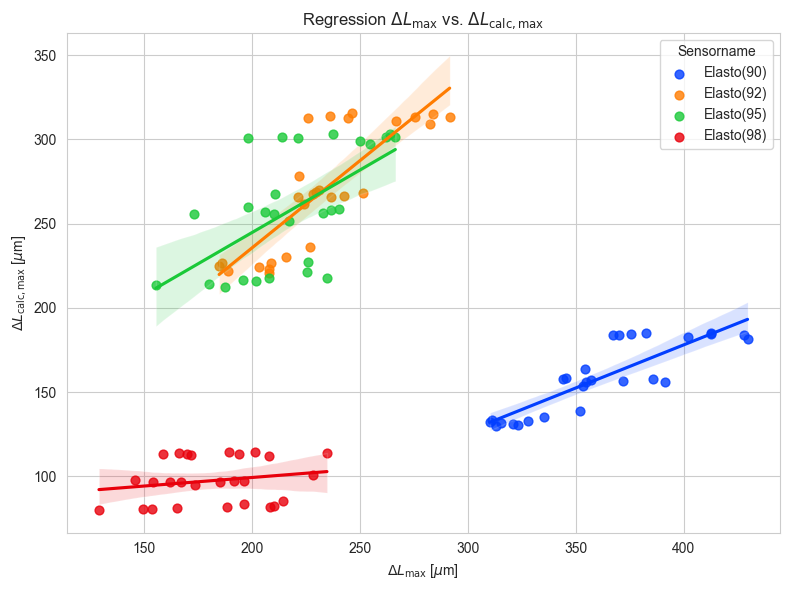

In [166]:
# Achsenvariablen definieren
x_key = 'max_strain'
y_key = 'calc_max_strain'
plot_title = f"Regression {get_label_from_dict(x_key, data_dict, template='{Zeichen}')} vs. {get_label_from_dict(y_key, data_dict, template='{Zeichen}')}"
filename = f"{x_key}_vs_{y_key}"

# Plot erstellen
fig = plt.figure(figsize=(8, 6))

for name, group in df.groupby('sensor_name', observed=False):
    sns.regplot(
        x=group[x_key],
        y=group[y_key],
        color=sensor_color_dict.get(name, "gray"),
        label=name,
        scatter_kws={"s": 40}
    )

plt.title(plot_title)
plt.xlabel(get_label_from_dict(x_key, data_dict, use_axes=True))
plt.ylabel(get_label_from_dict(y_key, data_dict, use_axes=True))
plt.legend(title='Sensorname')
plt.tight_layout()
plt.show()

# Plot speichern
PLOT_MANAGER.save_plot(fig, filename=filename, subdir="ptq_strain")


In [167]:
# Berechnung von Mittelwerten und Standardabweichungen
df_strain_stats = df.groupby('sensor_name', observed=False).agg(
    calc_max_strain_mean=('calc_max_strain', 'mean'),
    calc_max_strain_sd=('calc_max_strain', 'std'),
    ptq_max_strain_mean=('max_strain', 'mean'),
    ptq_max_strain_sd=('max_strain', 'std'),
    strain_difference_mean=('strain_difference', 'mean'),
    strain_difference_sd=('strain_difference', 'std')
)
# Automatische Umbenennung der Spalten basierend auf data_dict
columns_new = [(data_dict[var]['Zeichen'], stat) for var, stat in zip(
    ['calc_max_strain', 'calc_max_strain', 'max_strain', 'max_strain', 'strain_difference', 'strain_difference'],
    ['mean', 'sd', 'mean', 'sd', 'mean', 'sd']
)]
df_strain_stats.columns = pd.MultiIndex.from_tuples(columns_new)
df_strain_stats

$\Delta L_{\mathrm{calc,max}}$             \
                                      mean         sd   
sensor_name                                             
Elasto(90)                      158.073110  21.360503   
Elasto(92)                      268.991128  36.348913   
Elasto(95)                      258.646472  34.951034   
Elasto(98)                       97.483702  13.173024   

            $\Delta L_{\mathrm{max}}$            $\Delta \varepsilon$  \
                                 mean         sd                 mean   
sensor_name                                                             
Elasto(90)                 360.955556  35.985417           -56.286854   
Elasto(92)                 232.140741  29.171644            16.027369   
Elasto(95)                 218.670370  28.335922            19.079464   
Elasto(98)                 181.800000  26.336214           -45.505553   

                        
                    sd  
sensor_name             
Elasto(90)    3.078796  
Elasto(92)    8.854493  
Elasto(95)   14.769830  
Elasto(98)    9.392444

In [168]:
# Berechnung des MAPE
strain_difference_mape = df['strain_difference'].abs().mean().round(2)
strain_difference_mape

np.float64(34.39)

### LATEX-EXPORT:

In [169]:
# Automatische Einheitenzuweisung
df_units = pd.DataFrame([[data_dict[var]['Einheit'] for var in ['calc_max_strain', 'calc_max_strain', 'max_strain', 'max_strain', 'strain_difference', 'strain_difference']]],
                        columns=df_strain_stats.columns, index=['Einheit'])

# MAPE als eigene Zeile hinzufügen
df_mape = pd.DataFrame([['', '', '', '', strain_difference_mape, '']], 
                        columns=df_strain_stats.columns, index=['MAPE'])

# DataFrames zusammenführen
df_strain_stats_add = pd.concat([df_units, df_strain_stats, df_mape])
df_strain_stats_add

$\Delta L_{\mathrm{calc,max}}$             \
                                     mean         sd   
Einheit                            $\mu$m     $\mu$m   
Elasto(90)                      158.07311  21.360503   
Elasto(92)                     268.991128  36.348913   
Elasto(95)                     258.646472  34.951034   
Elasto(98)                      97.483702  13.173024   
MAPE                                                   

           $\Delta L_{\mathrm{max}}$            $\Delta \varepsilon$            
                                mean         sd                 mean        sd  
Einheit                       $\mu$m     $\mu$m                   \%        \%  
Elasto(90)                360.955556  35.985417           -56.286854  3.078796  
Elasto(92)                232.140741  29.171644            16.027369  8.854493  
Elasto(95)                 218.67037  28.335922            19.079464  14.76983  
Elasto(98)                     181.8  26.336214           -45.505553  9.392444  
MAPE                                                           34.39

In [170]:
# Konvertierung des DataFrames mit Multi-Index-Spalten in einen LaTeX-String
latex_string = df_strain_stats_add.to_latex(
    index=True,
    escape=False,
    float_format="{:0.2f}".format,
    multicolumn=True,
    multicolumn_format="c",
    column_format="l|rr|rr|rr"
)

# Definition der Beschriftung für die LaTeX-Tabelle
caption = "Feldversuch 2 - Ergebnisse, Zusammenfassung Vergleich gemessene und rechnerische Faserdehnung "
caption_long = "Feldversuch 2 - Ergebnisse, Zusammenfassung Vergleich gemessene und rechnerische Faserdehnung, Mittelwerte und Standardabweichungen der Abweichung der rechnerischen von der gemessenen maximalen Dehnung, gruppiert über Elastometer bzw. Position"

save_latex_table(latex_string, caption, latex_export_directory, caption_long)

Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\feldversuch_2_ergebnisse_zusammenfassung_vergleich_gemessene_und_rechnerische_faserdehnung.tex


In [171]:
# Liste der benötigten Variablen
variables = ["id", "treatment", "sensor_name", "height", "diameter", "release_force_target", "rope_release", "cable_max", "max_compression", "max_strain", "calc_max_strain", "strain_difference"]

# DataFrame kopieren und die gewünschten Spalten auswählen
df_latex = df.copy()[variables]

# Spaltennamen mit den Kurzbezeichnungen (Zeichen) aus dem data_dict umbenennen
df_latex = df_latex.rename(columns={var: data_dict[var]["Zeichen"] for var in variables})
# Funktionsaufruf mit Beispielparametern
generate_grouped_latex_tables(
    df_latex=df_latex,
    caption="Feldversuch 2 - Ergebnisse, Kräfte und Randfaserdehnungen (gemessen und berechnet) vollständig",
    column_format="lll|rr|rr|r|rr|rr",
    group_by="treatment",
    latex_export_directory=latex_export_directory
)


Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\feldversuch_2_ergebnisse_krafte_und_randfaserdehnungen_gemessen_und_berechnet_vollstandig.tex


In [198]:
# Erstelle die Liste der einzelnen Gruppen aus "treatment" und füge "Alle" hinzu
treatment_groups = list(df["treatment"].unique())
treatment_groups.append("Alle")

# Liste, in der die Beschreibungen pro Gruppe gespeichert werden
describe_list = []

# Für jede Gruppe (bzw. 'Alle') wird describe() aufgerufen
for group in treatment_groups:
    if group == "Alle":
        # Gesamte Daten auswählen
        data_temp = df[variables].copy()
    else:
        # Daten nur für die aktuelle Gruppe auswählen
        data_temp = df.loc[df["treatment"] == group, variables].copy()
    
    # Berechne die beschreibende Statistik
    descr = data_temp.describe()
    
    # Speichere die originale Reihenfolge der Statistik-Zeilen, z.B. ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    stats_order = list(descr.index)
    
    # Erzeuge einen zweistufigen MultiIndex, wobei:
    #   - Die erste Ebene den jeweiligen "group"-Namen enthält
    #   - Die zweite Ebene als geordnete Kategorie mit der Reihenfolge aus stats_order definiert wird
    multi_index = pd.MultiIndex.from_arrays(
        [
            [group] * len(descr.index),
            pd.Categorical(descr.index, categories=stats_order, ordered=True)
        ],
        names=["Behandlung", "Statistik"]
    )
    descr.index = multi_index
    
    # Füge diese Gruppe zur Ergebnisliste hinzu
    describe_list.append(descr)

# Füge alle Teilergebnisse wieder zu einem großen DataFrame zusammen.
df_latex = pd.concat(describe_list)

# Stelle sicher, dass der erste Index ("Behandlung") als geordnete Kategorie vorliegt,
# damit das Sortieren exakt in der Reihenfolge erfolgt, wie in treatment_groups definiert.
df_latex.index = df_latex.index.set_levels(
    [
        pd.CategoricalIndex(df_latex.index.levels[0], categories=treatment_groups, ordered=True),
        df_latex.index.levels[1]  # Der zweite Level bleibt bereits als geordnete Kategorie
    ]
)

# Sortiere ausschließlich nach dem Behandlung-Level, ohne dabei die Reihenfolge der Statistik zu ändern.
df_latex = df_latex.sort_index(level="Behandlung", sort_remaining=False)

# Ausgabe des Resultats:
df_latex


id    height  diameter  release_force_target  \
Behandlung   Statistik                                                         
free         count       36.000000      36.0      36.0             36.000000   
             mean         6.000000     14.15  0.218838              2.400000   
             std          2.618615  2.588408  0.025964              0.331231   
             min          2.000000      11.6   0.18462              2.000000   
             25%          4.000000      11.6  0.198944              2.000000   
             50%          6.000000    14.075  0.222817              2.400000   
             75%          8.000000    16.625  0.242711              2.800000   
             max         10.000000     16.85  0.245099              2.800000   
gefa_dynamic count       36.000000      36.0      36.0             36.000000   
             mean        15.000000     14.15  0.218838              2.400000   
             std          2.618615  2.588408  0.025964              0.331231   
             min         11.000000      11.6   0.18462              2.000000   
             25%         13.000000      11.6  0.198944              2.000000   
             50%         15.000000    14.075  0.222817              2.400000   
             75%         17.000000    16.625  0.242711              2.800000   
             max         19.000000     16.85  0.245099              2.800000   
cobra_static count       36.000000      36.0      36.0             36.000000   
             mean        24.000000     14.15  0.218838              2.400000   
             std          2.618615  2.588408  0.025964              0.331231   
             min         20.000000      11.6   0.18462              2.000000   
             25%         22.000000      11.6  0.198944              2.000000   
             50%         24.000000    14.075  0.222817              2.400000   
             75%         26.000000    16.625  0.242711              2.800000   
             max         28.000000     16.85  0.245099              2.800000   
Alle         count      108.000000     108.0     108.0            108.000000   
             mean        15.000000     14.15  0.218838              2.400000   
             std          7.825193  2.564103  0.025721              0.328121   
             min          2.000000      11.6   0.18462              2.000000   
             25%          8.000000      11.6  0.198944              2.000000   
             50%         15.000000    14.075  0.222817              2.400000   
             75%         22.000000    16.625  0.242711              2.800000   
             max         28.000000     16.85  0.245099              2.800000   

                        rope_release  cable_max  max_compression  max_strain  \
Behandlung   Statistik                                                         
free         count         36.000000   0.000000        36.000000   36.000000   
             mean           2.358678        NaN      -130.872222  250.544444   
             std            0.322654        NaN        40.377686   79.279309   
             min            1.946800        NaN      -207.200000  128.900000   
             25%            1.978300        NaN      -168.850000  195.575000   
             50%            2.369200        NaN      -113.100000  233.850000   
             75%            2.723100        NaN       -97.900000  296.900000   
             max            2.762050        NaN       -71.100000  429.600000   
gefa_dynamic count         36.000000  36.000000        36.000000   36.000000   
             mean           2.379867   1.196667       -85.330556  257.005556   
             std            0.305537   0.172246        61.084316   70.528507   
             min            1.997400   1.010000      -210.400000  158.600000   
             25%            2.080950   1.030000      -138.800000  212.625000   
             50%            2.347550   1.160000       -69.750000  230.600000   
             75%            2.7

In [199]:
# Entferne die Spalte "ID", falls vorhanden
df_latex.drop(columns="id", axis=1, inplace=True)

# Optional: Spaltennamen gemäß data_dict umbenennen (nur, falls die Variable im data_dict existiert)
df_latex.rename(columns={var: data_dict[var]["Zeichen"] for var in variables if var in data_dict}, inplace=True)

# Entferne "%" aus der "Statistik"-Ebene des MultiIndex mittels pandas' str.replace
df_latex.index = df_latex.index.set_levels(
    df_latex.index.levels[1].str.replace('%', '\%'), 
    level="Statistik"
)


# Entferne "%" aus der "Statistik"-Ebene des MultiIndex mittels pandas' str.replace
df_latex.index = df_latex.index.set_levels(
    df_latex.index.levels[0].str.replace('_', '\_'), 
    level="Behandlung"
)
df_latex

$h$       $d$  $F_{\mathrm{release,target}}$  \
Behandlung    Statistik                                                      
free          count          36.0      36.0                      36.000000   
              mean          14.15  0.218838                       2.400000   
              std        2.588408  0.025964                       0.331231   
              min            11.6   0.18462                       2.000000   
              25\%           11.6  0.198944                       2.000000   
              50\%         14.075  0.222817                       2.400000   
              75\%         16.625  0.242711                       2.800000   
              max           16.85  0.245099                       2.800000   
gefa\_dynamic count          36.0      36.0                      36.000000   
              mean          14.15  0.218838                       2.400000   
              std        2.588408  0.025964                       0.331231   
              min            11.6   0.18462                       2.000000   
              25\%           11.6  0.198944                       2.000000   
              50\%         14.075  0.222817                       2.400000   
              75\%         16.625  0.242711                       2.800000   
              max           16.85  0.245099                       2.800000   
cobra\_static count          36.0      36.0                      36.000000   
              mean          14.15  0.218838                       2.400000   
              std        2.588408  0.025964                       0.331231   
              min            11.6   0.18462                       2.000000   
              25\%           11.6  0.198944                       2.000000   
              50\%         14.075  0.222817                       2.400000   
              75\%         16.625  0.242711                       2.800000   
              max           16.85  0.245099                       2.800000   
Alle          count         108.0     108.0                     108.000000   
              mean          14.15  0.218838                       2.400000   
              std        2.564103  0.025721                       0.328121   
              min            11.6   0.18462                       2.000000   
              25\%           11.6  0.198944                       2.000000   
              50\%         14.075  0.222817                       2.400000   
              75\%         16.625  0.242711                       2.800000   
              max           16.85  0.245099                       2.800000   

                         $F_{\mathrm{release}}$  $F_{\mathrm{cable, max}}$  \
Behandlung    Statistik                                                      
free          count                   36.000000                   0.000000   
              mean                     2.358678                        NaN   
              std                      0.322654                        NaN   
              min                      1.946800                        NaN   
              25\%                     1.978300                        NaN   
              50\%                     2.369200                        NaN   
              75\%                     2.723100                        NaN   
              max                      2.762050                        NaN   
gefa\_dynamic count                   36.000000                  36.000000   
              mean                     2.379867                   1.196667   
              std                      0.305537                   0.172246   
              min                      1.997400                   1.010000   
              25\%                     2.080950                   1.030000   
              50\%                     2.347550                   1.160000   
              75\%                     2.757850                   1.330000   
              max                      2.780100    

In [201]:


# Konvertierung des DataFrames mit Multi-Index-Spalten in einen LaTeX-String
latex_string = df_latex.to_latex(
    index=True,
    escape=False,
    float_format="{:0.2f}".format,
    multicolumn=True,
    multicolumn_format="c",
    column_format="ll|rr|rr|r|rr|rr"
)

# Definition der Beschriftung für die LaTeX-Tabelle
caption = "Feldversuch 2 - Ergebnisse, Statistische Zusammenfassung, Kräfte und Randfaserdehnungen (gemessen und berechnet)"
caption_long = "Feldversuch 2 - Ergebnisse, Statistische Zusammenfassung, Kräfte und Randfaserdehnungen (gemessen und berechnet)"
save_latex_table(latex_string, caption, latex_export_directory, caption_long)

Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\feldversuch_2_ergebnisse_statistische_zusammenfassung_krafte_und_randfaserdehnungen_gemessen_und_berechnet.tex


### Theoretische Berechnungen der Belastung der KS

In [29]:
def calculate_force(epsilon: float, H: float, h: float, d: float, E: float) -> float:
    """
    Berechnet die Zugkraft force (in kN) basierend auf der Randfaserdehnung epsilon bzw. der Dehnung an der Elastizitätsgrenze.
    
    Parameters:
        epsilon (float): Randfaserdehnung (dimensionslos, nicht in %)
        H (float): Höhe des Angriffspunktes der Zugkraft über dem Stammfuß (m)
        h (float): Höhe des Berechnungspunktes über dem Boden (m)
        d (float): Durchmesser des Stammquerschnitts auf Höhe h (m)
        E (float): Elastizitätsmodul des Holzes (in MPa)
    
    Returns:
        float: Berechnete Zugkraft force (in kN)
    """
    y_max = d / 2  # maximaler Abstand zur neutralen Achse in m
    I = (np.pi / 64) * d**4  # Flächenträgheitsmoment in m^4
    E_Pa = E * 1e6  # Umrechnung des Elastizitätsmoduls von MPa in N/m^2
    force_N = (epsilon * E_Pa * I) / ((H - h) * y_max)  # Zugkraft in N
    force_kN = force_N / 1000  # Umrechnung in kN
    return force_kN

In [30]:
# Fixwerte
epsilon = 0.0026  # Elastizitätsgrenze Buche
E = 8500  # Elastizitätsmodul Buche in MPa
height_ks = 17.40  # m, Höhe des Angriffspunktes der KS
height_forke = 10.31  # m, Höhe des Zwiesels
stem_diameter = 0.35  # m, Durchmesser des Stammes knapp über dem Zwiesel

# Berechnung der Zugkraft
force = calculate_force(epsilon, height_ks, height_forke, stem_diameter, E)
force

13.12049034291625

In [31]:
tree_height = (26.15 + 27.2)/2
optimal_ks_height = ((tree_height - height_forke) * (2/3)) + height_forke
optimal_ks_height

21.22

In [32]:
force = calculate_force(epsilon, optimal_ks_height, height_forke, stem_diameter, E)
force

8.526514805799835

### PTQ: Analyse der Stauchungswerte nach Elastometer und Behandlungsvarianten

In [34]:
# Mixed-Effects Model
model = smf.mixedlm(
    "max_compression ~ C(treatment) + C(sensor_name) + rope_release",
    data=df,
    groups=df["id"]  # Gruppierung nach Beobachtungsgruppe
).fit()

# Ergebnisse
print(model.summary())

                    Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      max_compression
No. Observations:       108          Method:                  REML           
No. Groups:             27           Scale:                   540.8129       
Min. group size:        4            Log-Likelihood:          -473.5589      
Max. group size:        4            Converged:               Yes            
Mean group size:        4.0                                                  
-----------------------------------------------------------------------------
                              Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                    -149.614   18.904 -7.914 0.000 -186.665 -112.562
C(treatment)[T.gefa_dynamic]   45.872    5.888  7.791 0.000   34.333   57.412
C(treatment)[T.cobra_static]   66.908    5.887 11.365 0.000   55.370   78.446
C(sens

In [35]:
# Tukey HSD Test für die 'treatment' Gruppe
tukey_treatment = mc.pairwise_tukeyhsd(endog=df['max_compression'],
                                    groups=df['treatment'],
                                    alpha=0.05)
print(tukey_treatment)

# Tukey HSD Test für die 'sensor_name' Gruppe
tukey_sensor = mc.pairwise_tukeyhsd(endog=df['max_compression'],
                                 groups=df['sensor_name'],
                                 alpha=0.05)
print(tukey_sensor)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1       group2    meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
cobra_static         free -66.6333    0.0 -94.8298 -38.4369   True
cobra_static gefa_dynamic -21.0917 0.1818 -49.2881   7.1048  False
        free gefa_dynamic  45.5417 0.0006  17.3452  73.7381   True
------------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
Elasto(90) Elasto(92)  98.1296    0.0  71.8126 124.4466   True
Elasto(90) Elasto(95)  98.5852    0.0  72.2682 124.9022   True
Elasto(90) Elasto(98)  25.4519 0.0619  -0.8652  51.7689  False
Elasto(92) Elasto(95)   0.4556    1.0 -25.8615  26.7726  False
Elasto(92) Elasto(98) -72.6778    0.0 -98.9948 -46.3608   True
Elasto(95) Elasto(98) -73.1